# <span style="color:yellow" ><h3 align="center"> <b>_POPULATION BY AGE GROUP_ </h3>
<h3 align="center">authour : <span style="color:purple" > <b> Mpho Moremoholo (219123689) </H3>
    
<h3 align="center">date : <span style="color:red" ><b> Mar/Apr 2023. </H3>
    
<h3 align="center">source : <span style="color:orange" > <b> https://www.kaggle.com/code/guslovesmath/population-by-age-group </H3>
    
<h3 align="center">github : <span style="color:green" > <b> ??? </H3>

In [64]:
import pandas as pd
import numpy as np
from scipy import stats
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm, skew 

colors = ['blue',
          'red',
          'orange',
          'violet',
          'pink',
          'lime',
          'green',
          'slateblue',
          'purple',
          'steelblue',
          'peach',
          'black',
          'navy',
          'grey']

## <span style="color:pink" ><h3 align="center"> <b>_RAW DATA_ </h3>

In [69]:
population = pd.read_csv('population_by_age_group')
population


,Country,Total,65+,25-64 years,15-24 years,5-14 years,0-4 years
0,Afghanistan,40099460,964016,12995277,8727160,10922454,6490554
1,Albania,2854710,463442,1527360,399113,323402,141393
2,Algeria,44177964,2731079,21871300,6007614,8697129,4870841
3,American Samoa,45056,3088,22433,7141,8365,4029
4,Andorra,79057,11499,48651,8570,7797,2540
...,...,...,...,...,...,...,...
230,Wallis and Futuna,11654,1521,5767,1652,1961,753
231,Western Sahara,565590,31718,314200,80572,92147,46953
232,Yemen,32981644,886890,12210659,6733620,8436417,4714059
233,Zambia,19473132,338628,6734346,3975624,5351636,3072899


## <span style="color:pink" ><h3 align="center"> <b>_SORTED DATA_ </h3>

In [72]:
population.rename(columns=str.lower, inplace=True)
population.sort_values('total', ascending=False, inplace=True)
population.reset_index(drop=True, inplace=True)

print('Sorted Population by Age Group Data: ')
display(population)

Sorted Population by Age Group Data: 


,country,total,65+,25-64 years,15-24 years,5-14 years,0-4 years
0,China,1425893500,187501470,825714200,160749910,177138190,74789700
1,India,1407563900,95749030,695659970,254585650,246261830,115307420
2,United States,336997630,56207480,175246610,44064944,42314180,19164416
3,Indonesia,273753180,18559456,141328830,44122208,47328380,22414316
4,Pakistan,231402110,9768444,89368240,46785260,55875700,29604480
...,...,...,...,...,...,...,...
230,Saint Helena,5428,1451,2853,366,537,221
231,Montserrat,4438,766,2429,648,399,196
232,Falkland Islands,3786,411,2292,411,460,212
233,Niue,1957,295,942,206,369,145


## <span style="color:ORANGE" ><h3 align="center"> <b>_NULLS_ </h3>

In [136]:
population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235 entries, 0 to 234
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   country      235 non-null    object
 1   total        235 non-null    int64 
 2   65+          235 non-null    int64 
 3   25-64 years  235 non-null    int64 
 4   15-24 years  235 non-null    int64 
 5   5-14 years   235 non-null    int64 
 6   0-4 years    235 non-null    int64 
dtypes: int64(6), object(1)
memory usage: 13.0+ KB


# <span style="color:pink" ><h3 align="center"> <b>_DESCRIPTIVE STATISTICS_ </h3>

## <span style="color:ORANGE" ><h3 align="center"> <b>_MEAN_ </h3>

In [24]:
population.mean(numeric_only=True)

##population.describe().iloc[1:, 1:].T.style.background_gradient()

Total          3.365653e+07
65+            3.239456e+06
25-64 years    1.663291e+07
15-24 years    5.209602e+06
5-14 years     5.717213e+06
0-4 years      2.857348e+06
dtype: float64

## <span style="color:ORANGE" ><h3 align="center"> <b>_MEDIAN_ </h3>

In [10]:
population.median(numeric_only=True)

total          5457165.0
65+             372700.0
25-64 years    2784971.0
15-24 years     746224.0
5-14 years      764267.0
0-4 years       412351.0
dtype: float64

## <span style="color:ORANGE" ><h3 align="center"> <b>_MODE_ </h3>

In [15]:
print('Mode:\n', population.mode(), '\n')

Mode:
                country       total        65+  25-64 years  15-24 years  \
0          Afghanistan        1869        159          852          206   
1              Albania        1957        292          942          313   
2              Algeria        3786        295         2292          366   
3       American Samoa        4438        411         2429          411   
4              Andorra        5428        704         2853          546   
..                 ...         ...        ...          ...          ...   
230  Wallis and Futuna   231402110   22626482    116867260     44064944   
231     Western Sahara   273753180   37118444    141328830     44122208   
232              Yemen   336997630   56207480    175246610     46785260   
233             Zambia  1407563900   95749030    695659970    160749910   
234           Zimbabwe  1425893500  187501470    825714200    254585650   

     5-14 years  0-4 years  
0           369        145  
1           375        170  
2    

## <span style="color:ORANGE" ><h3 align="center"> <b>_STANDARD DEVIATION_ </h3>

In [29]:
population.std(numeric_only=True)

Total          1.359563e+08
65+            1.459906e+07
25-64 years    7.266853e+07
15-24 years    2.062212e+07
5-14 years     2.107024e+07
0-4 years      9.809743e+06
dtype: float64

## <span style="color:ORANGE" ><h3 align="center"> <b>_MAX_ </h3>

In [43]:
population.max(numeric_only=True)

Total          1425893500
65+             187501470
25-64 years     825714200
15-24 years     254585650
5-14 years      246261830
0-4 years       115307420
dtype: int64

## <span style="color:ORANGE" ><h3 align="center"> <b>_MIN_ </h3>

In [44]:
population.min(numeric_only=True)

Total          1869
65+             159
25-64 years     852
15-24 years     206
5-14 years      369
0-4 years       145
dtype: int64

## <span style="color:ORANGE" ><h3 align="center"> <b>_RANGE_ </h3>

In [45]:
population.max(numeric_only=True) - population.min(numeric_only=True)

Total          1425891631
65+             187501311
25-64 years     825713348
15-24 years     254585444
5-14 years      246261461
0-4 years       115307275
dtype: int64

## <span style="color:ORANGE" ><h3 align="center"> <b>_SUM_ </h3>

In [46]:
population.sum(numeric_only=True)

Total          7909285293
65+             761272087
25-64 years    3908734689
15-24 years    1224256482
5-14 years     1343545168
0-4 years       671476855
dtype: int64

## <span style="color:ORANGE" ><h3 align="center"> <b>_COUNT_ </h3>

In [49]:
population.count(numeric_only=True)-1

Total          234
65+            234
25-64 years    234
15-24 years    234
5-14 years     234
0-4 years      234
dtype: int64

## <span style="color:ORANGE" ><h3 align="center"> <b>_SAMPLE VARIANCE_ </h3>

In [50]:
population.var(numeric_only=True)

Total          1.848413e+16
65+            2.131324e+14
25-64 years    5.280715e+15
15-24 years    4.252717e+14
5-14 years     4.439550e+14
0-4 years      9.623106e+13
dtype: float64

## <span style="color:ORANGE" ><h3 align="center"> <b>_KURTOSIS_ </h3>

In [51]:
population.kurtosis(numeric_only=True)

Total           91.110648
65+            116.222450
25-64 years     97.931944
15-24 years    105.174347
5-14 years      91.093128
0-4 years       86.261652
dtype: float64

## <span style="color:ORANGE" ><h3 align="center"> <b>_SKEWNESS_ </h3>

In [52]:
population.skew(numeric_only=True)

Total           9.187373
65+            10.050907
25-64 years     9.554528
15-24 years     9.612572
5-14 years      8.935973
0-4 years       8.527932
dtype: float64

## <span style="color:ORANGE" ><h3 align="center"> <b>_QUARTILES_ </h3>

In [68]:
# 25th quartile
population.quantile(0.25, numeric_only=True)



Total          21839214.0
65+             1534977.5
25-64 years     9579148.5
15-24 years     3715164.0
5-14 years      4494770.0
0-4 years       2075203.0
Name: 0.75, dtype: float64

In [69]:
# 50th quartile
population.quantile(0.5, numeric_only=True)



Total          5457165.0
65+             372700.0
25-64 years    2784971.0
15-24 years     746224.0
5-14 years      764267.0
0-4 years       412351.0
Name: 0.5, dtype: float64

In [70]:
# 75th quartile
population.quantile(0.75, numeric_only=True)



Total          21839214.0
65+             1534977.5
25-64 years     9579148.5
15-24 years     3715164.0
5-14 years      4494770.0
0-4 years       2075203.0
Name: 0.75, dtype: float64

## <span style="color:ORANGE" ><h3 align="center"> <b>_PERCENTILES_ </h3>

In [72]:
# 20th percentile
population.quantile(0.2, numeric_only=True)

total          222250.6
65+             18379.8
25-64 years    102297.8
15-24 years     38468.8
5-14 years      40065.4
0-4 years       17621.2
Name: 0.2, dtype: float64

In [73]:
# 40th percentile
population.quantile(0.4, numeric_only=True)

total          2747286.8
65+             164711.6
25-64 years    1392071.0
15-24 years     405016.4
5-14 years      403915.8
0-4 years       190163.4
Name: 0.4, dtype: float64

In [74]:
# 60th percentile
population.quantile(0.6, numeric_only=True)

total          9725901.6
65+             581512.2
25-64 years    4565777.6
15-24 years    1306003.8
5-14 years     1472303.2
0-4 years       763094.0
Name: 0.6, dtype: float64

In [75]:
# 80th percentile
population.quantile(0.8, numeric_only=True)

total          32228266.4
65+             2170692.6
25-64 years    13235042.8
15-24 years     5202265.8
5-14 years      5892911.6
0-4 years       3189459.2
Name: 0.8, dtype: float64

# <span style="color:pink" ><h3 align="center"> <b>_MY OWN DESCRIPTIVE STATISTICS_ </h3>

## <span style="color:ORANGE" ><h3 align="center"> <b>SIZE OF DATASET </h3>

In [35]:
print(population.size)

1645


## <span style="color:ORANGE" ><h3 align="center"> <b>SHAPE OF DATASET </h3>

In [36]:
print(population.shape)

(235, 7)


## <span style="color:ORANGE" ><h3 align="center"> <b>_CORRELATION_ </h3>

In [5]:
population.corr(numeric_only=True)

,total,65+,25-64 years,15-24 years,5-14 years,0-4 years
total,1.000000,0.932894,0.995153,0.972569,0.977300,0.955404
65+,0.932894,1.000000,0.957213,0.829486,0.841374,0.799296
25-64 years,0.995153,0.957213,1.000000,0.947092,0.952535,0.922888
15-24 years,0.972569,0.829486,0.947092,1.000000,0.995655,0.988064
5-14 years,0.977300,0.841374,0.952535,0.995655,1.000000,0.995414
0-4 years,0.955404,0.799296,0.922888,0.988064,0.995414,1.000000


## <span style="color:ORANGE" ><h3 align="center"> <b>_COVARIANCE_ </h3>

In [32]:
population.cov(numeric_only=True)

,total,65+,25-64 years,15-24 years,5-14 years,0-4 years
total,1.848413e+16,1.851641e+15,9.831864e+15,2.726801e+15,2.799604e+15,1.274219e+15
65+,1.851641e+15,2.131324e+14,1.015499e+15,2.497280e+14,2.588113e+14,1.144696e+14
25-64 years,9.831864e+15,1.015499e+15,5.280715e+15,1.419293e+15,1.458467e+15,6.578895e+14
15-24 years,2.726801e+15,2.497280e+14,1.419293e+15,4.252717e+14,4.326249e+14,1.998831e+14
5-14 years,2.799604e+15,2.588113e+14,1.458467e+15,4.326249e+14,4.439550e+14,2.057458e+14
0-4 years,1.274219e+15,1.144696e+14,6.578895e+14,1.998831e+14,2.057458e+14,9.623106e+13


# <span style="color:pink" ><h3 align="center"> <b>_GRAPHS_ </h3>

## <span style="color:ORANGE" ><h3 align="center"> <b>_SCATTER PLOT_ </h3>

In [133]:
d=pd.read_csv('population_by_age_group')
d

,Country,Total,65+,25-64 years,15-24 years,5-14 years,0-4 years
0,Afghanistan,40099460,964016,12995277,8727160,10922454,6490554
1,Albania,2854710,463442,1527360,399113,323402,141393
2,Algeria,44177964,2731079,21871300,6007614,8697129,4870841
3,American Samoa,45056,3088,22433,7141,8365,4029
4,Andorra,79057,11499,48651,8570,7797,2540
...,...,...,...,...,...,...,...
230,Wallis and Futuna,11654,1521,5767,1652,1961,753
231,Western Sahara,565590,31718,314200,80572,92147,46953
232,Yemen,32981644,886890,12210659,6733620,8436417,4714059
233,Zambia,19473132,338628,6734346,3975624,5351636,3072899


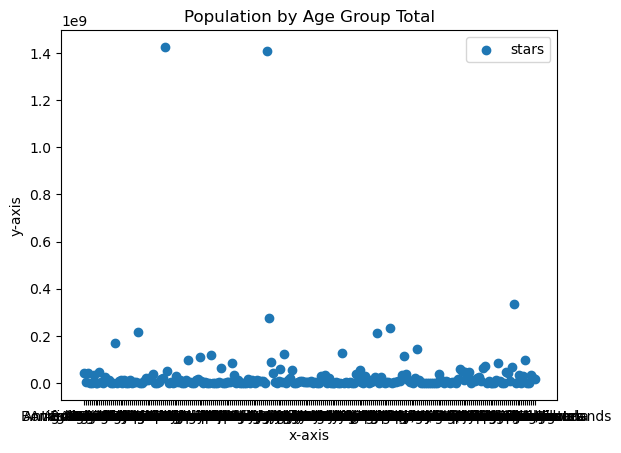

In [134]:
x=d['Country']
y=d['Total']
plt.scatter(x, y, label='stars')
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.title('Population by Age Group Total')
plt.legend()
plt.show()

## <span style="color:ORANGE" ><h3 align="center"> <b>_HISTOGRAM_ </h3>

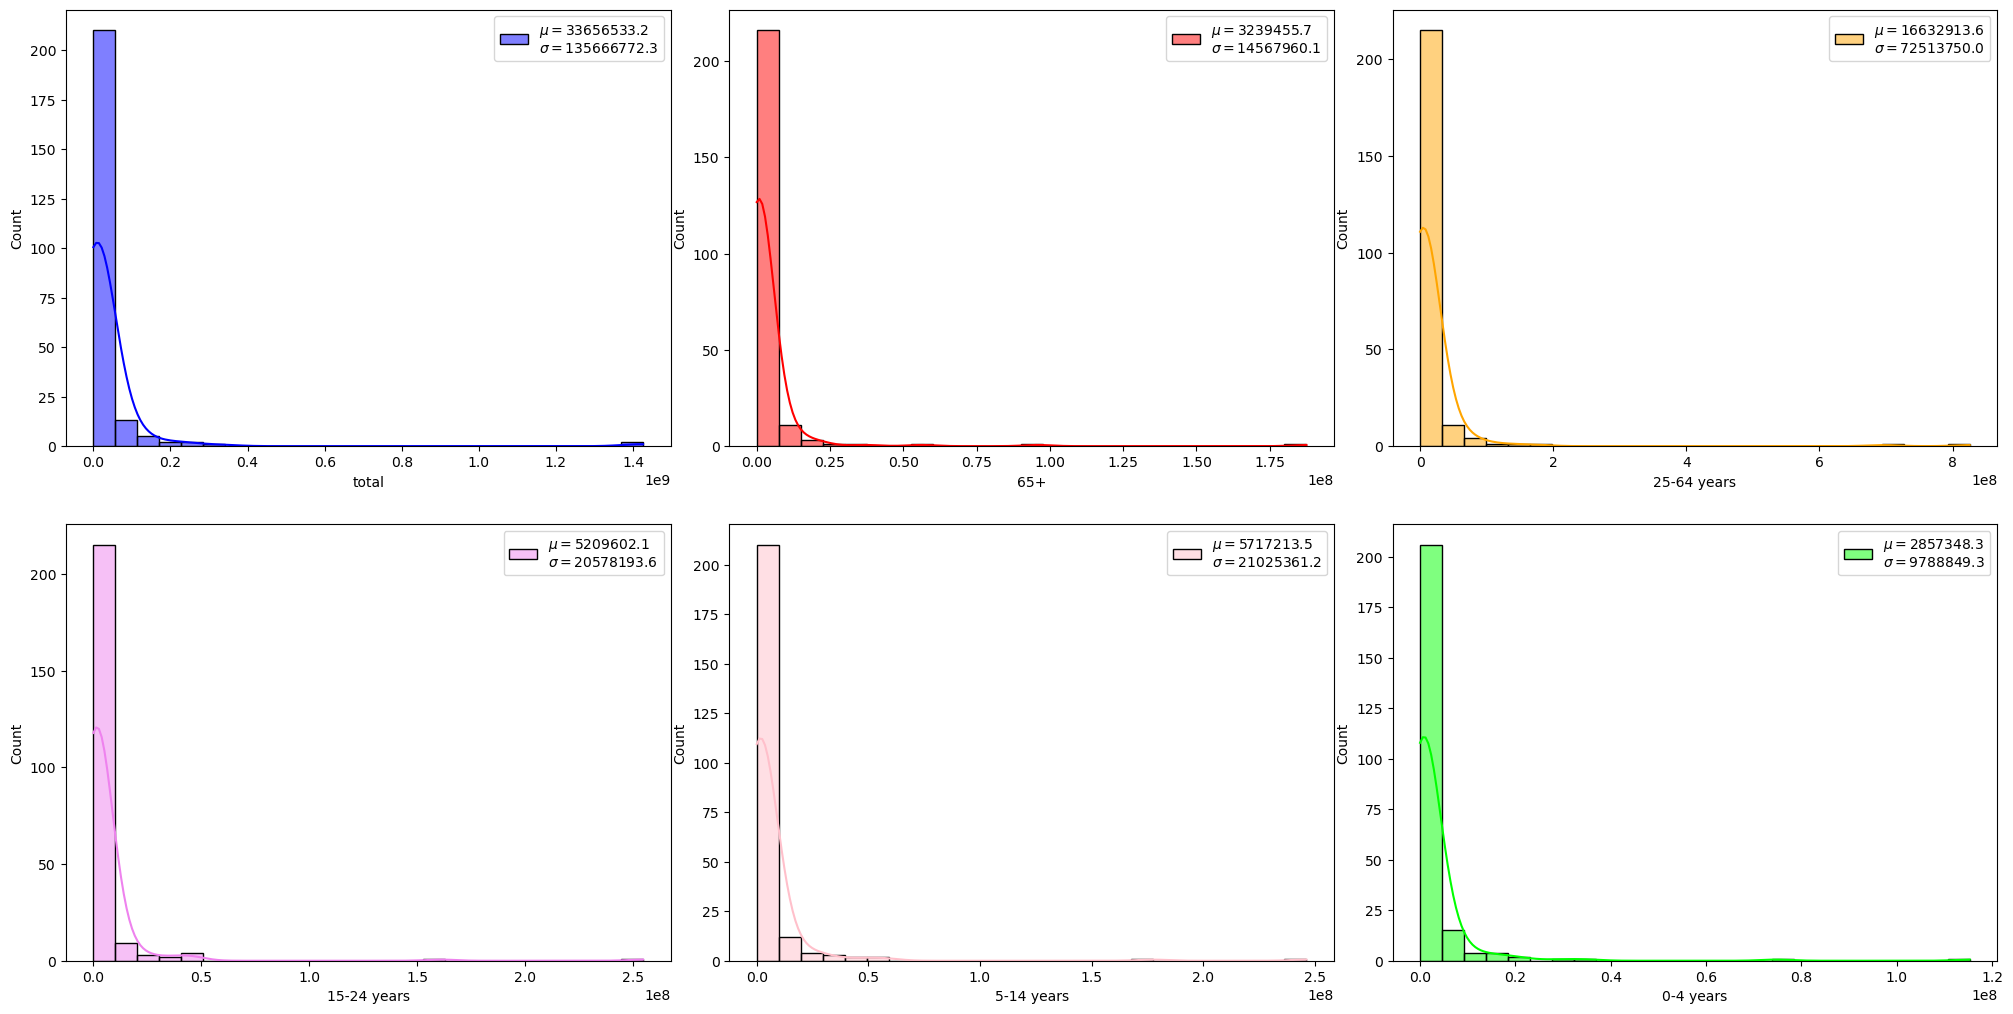

In [16]:
fig, ax = plt.subplots(ncols=3, nrows=2, figsize=(20, 10))
ax = ax.flatten()
i = 0

for _, v in population.drop(columns='country').items():
    mu, sigma = norm.fit(v)
    sns.histplot(v, color=colors[i], kde=True, bins=25, ax=ax[i],
                 label=f'$\mu={mu:.1f}$\n$\sigma={sigma:.1f}$')
    ax[i].legend()
    i += 1
    
plt.tight_layout(pad=0.2, w_pad=0.2, h_pad=2.5)
plt.show()

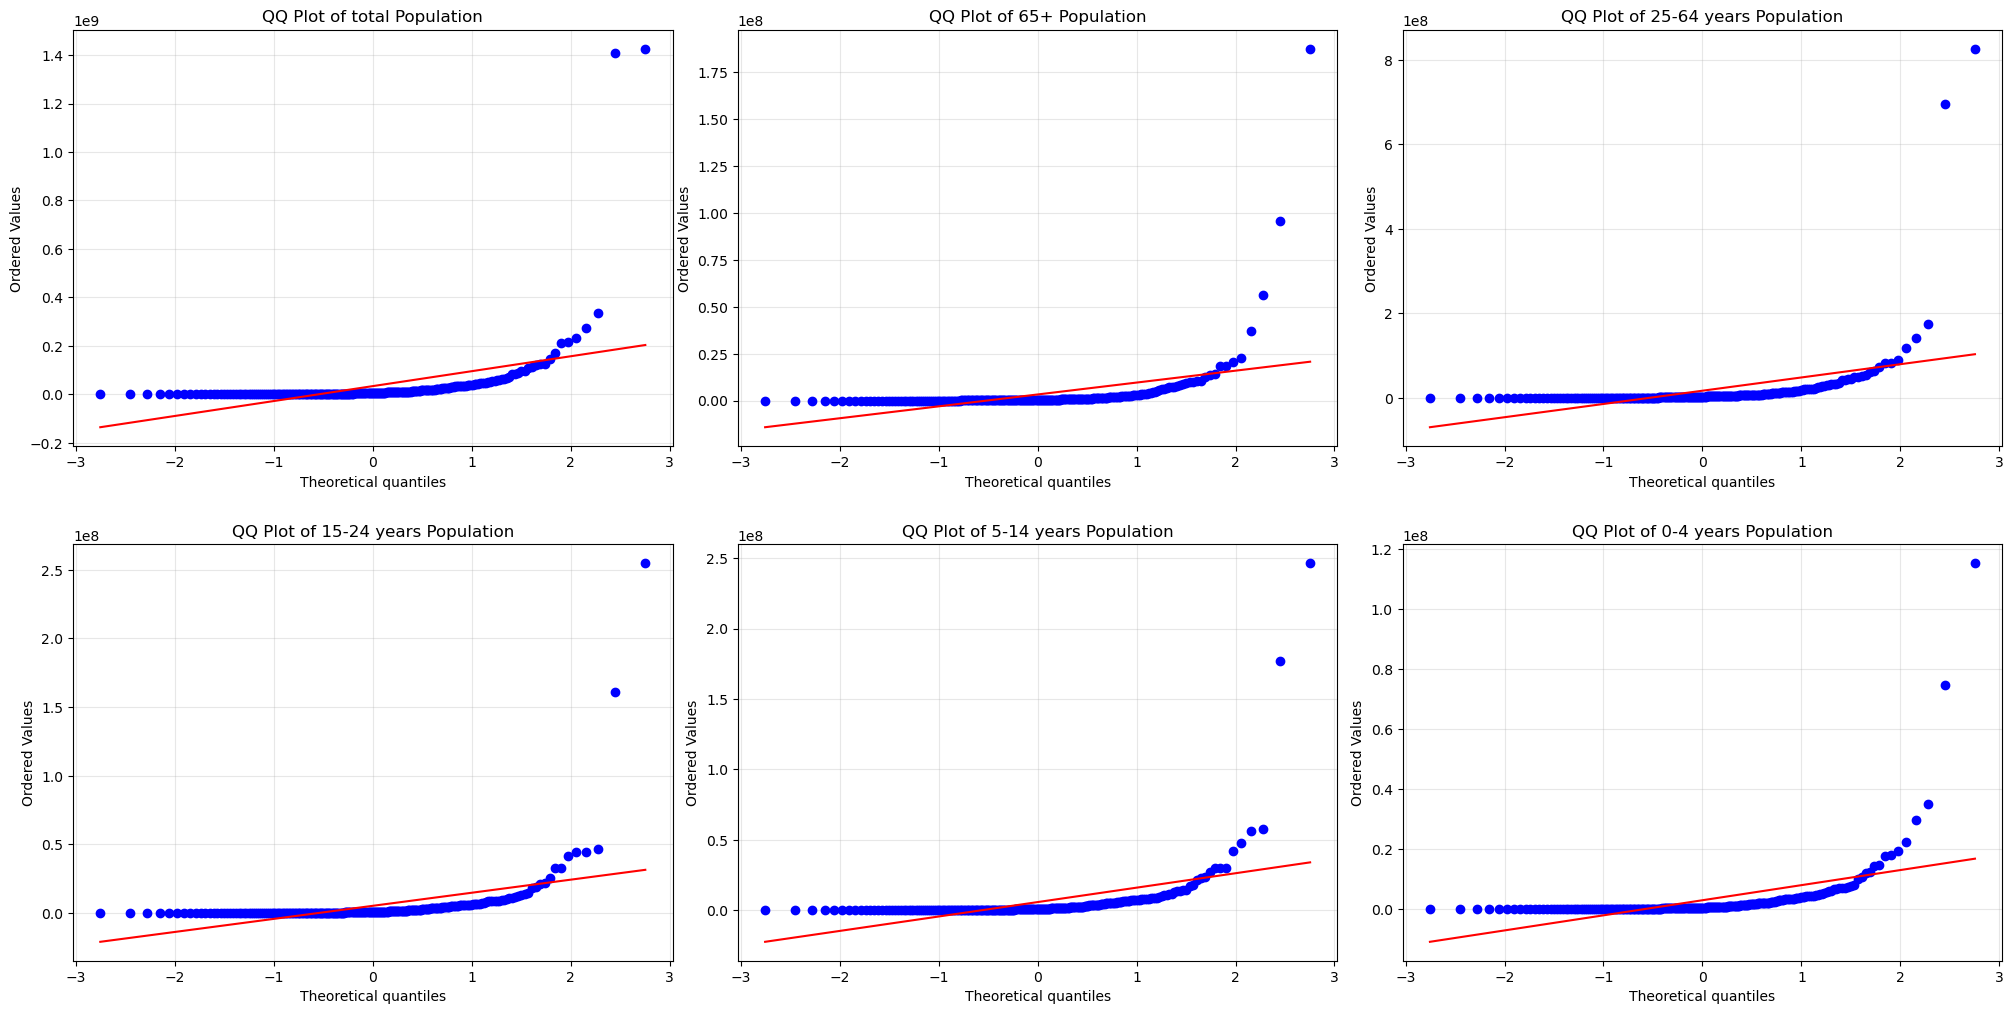

In [18]:
fig, ax = plt.subplots(2, 3, figsize=(20,10))
ax = ax.flatten()
i = 0

for col in population.drop(columns='country').columns:
    stats.probplot(population[col], plot=ax[i])
    ax[i].set_title(f'QQ Plot of {col} Population')
    ax[i].grid(alpha=0.3)
    i += 1

plt.tight_layout(pad=0.2, w_pad=0.2, h_pad=2.5)
plt.show()

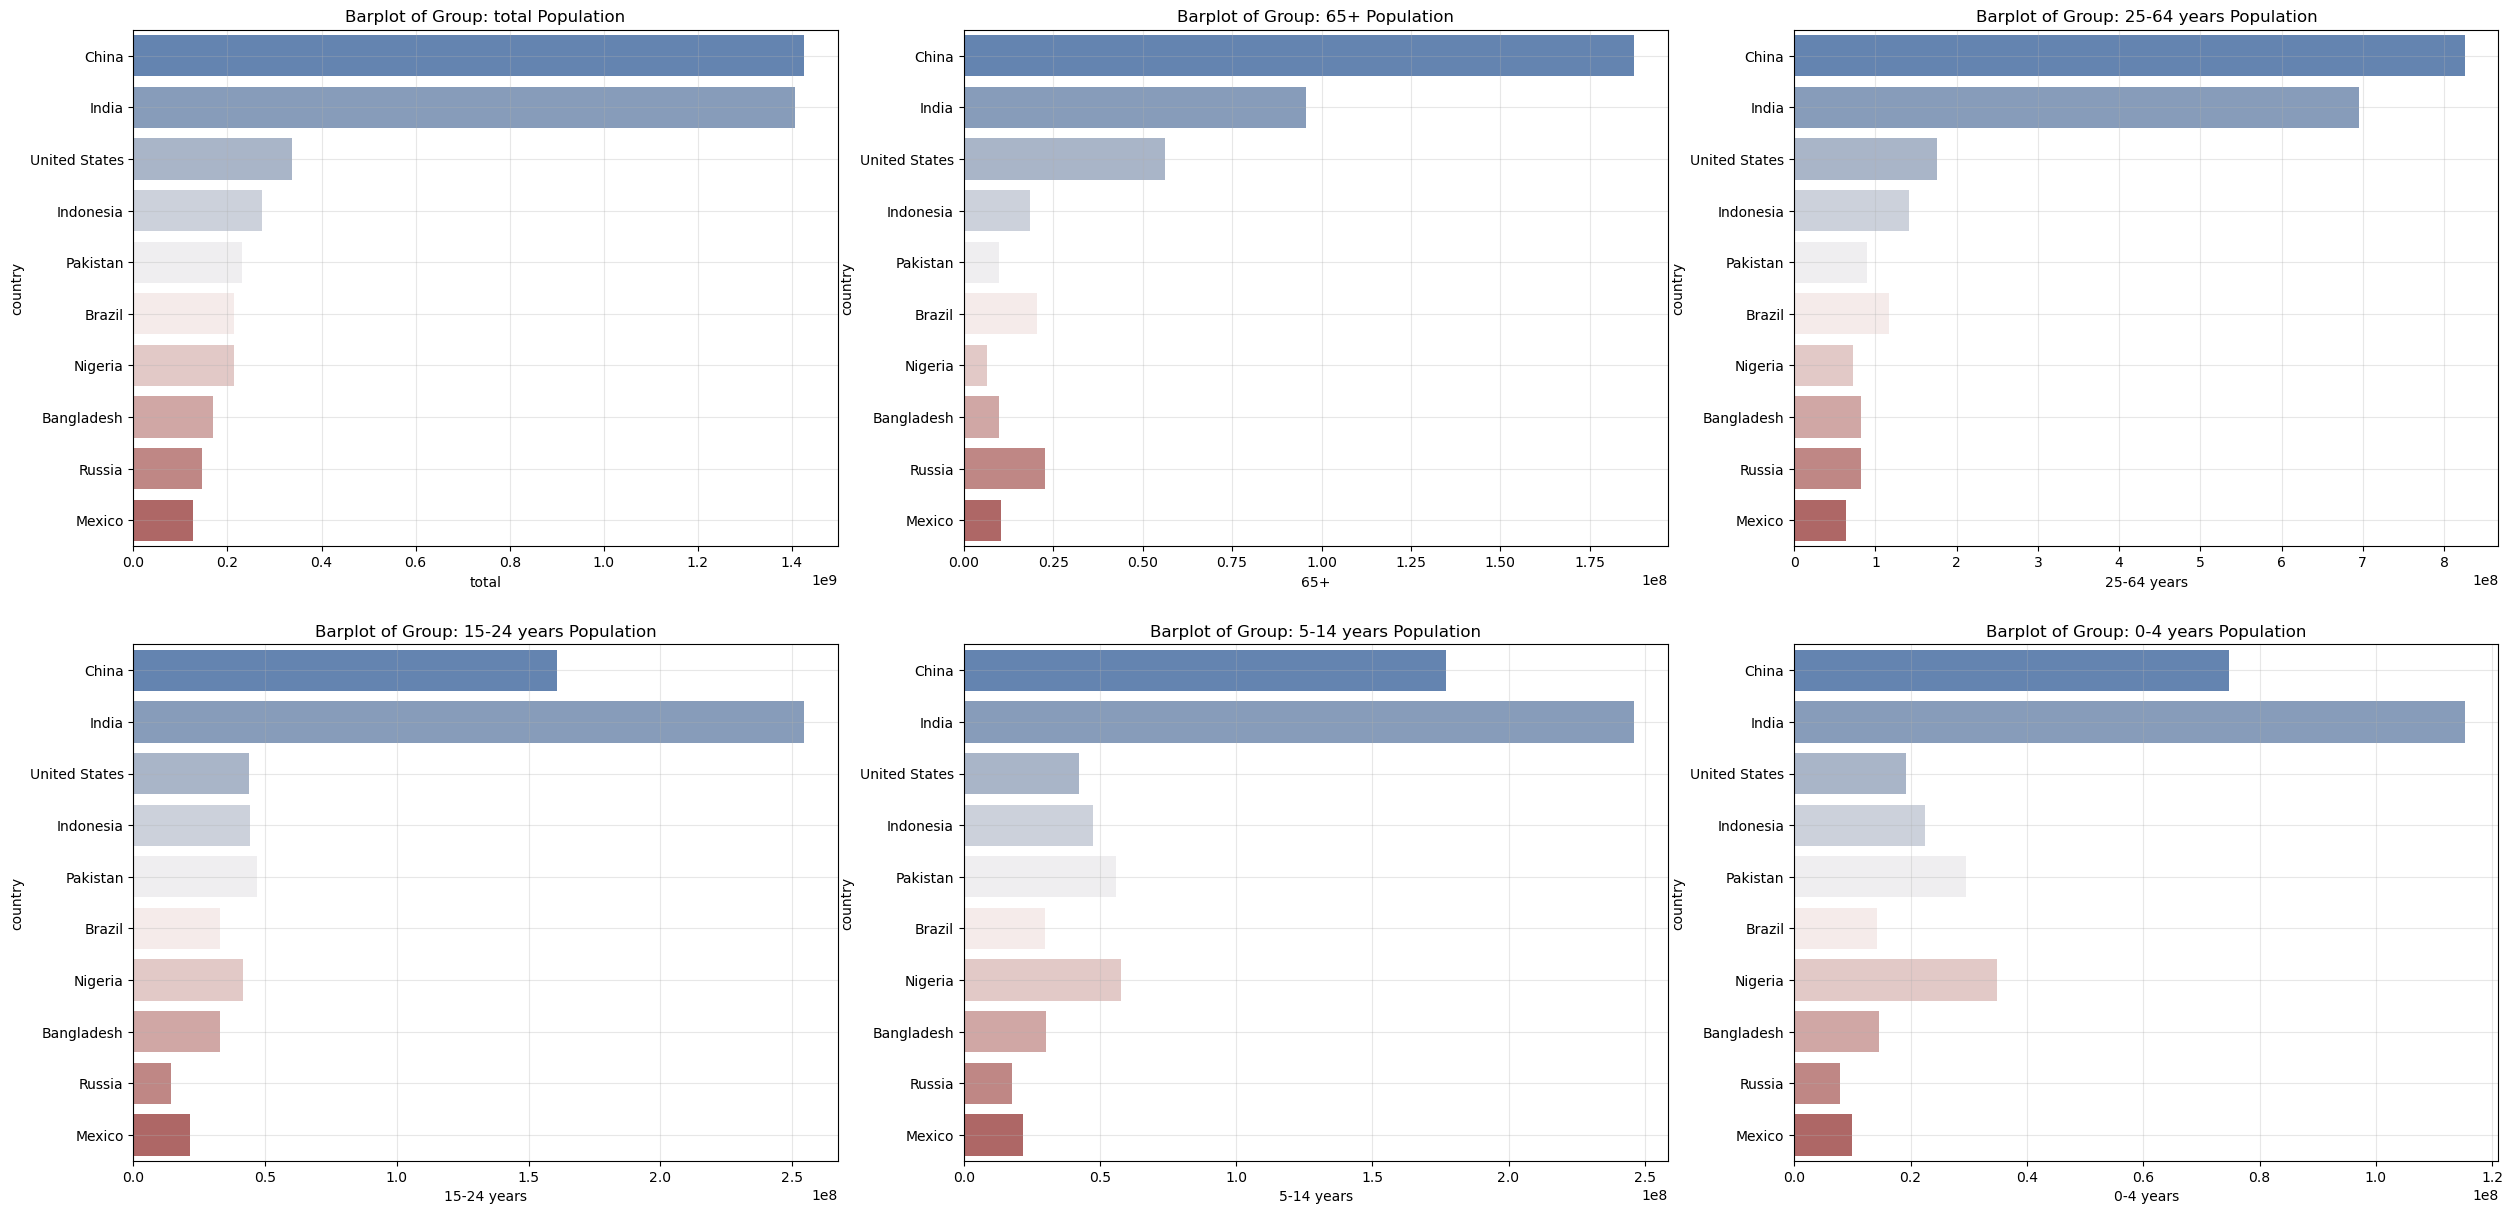

In [29]:
fig, ax = plt.subplots(2, 3, figsize=(25,12))
ax = ax.flatten()
i = 0

for k in population.drop(columns='country').columns:
    sns.barplot(x=population[k][:10], y=population['country'][:10], palette='vlag', ax=ax[i])
    ax[i].set_title(f"Barplot of Group: {k} Population")
    ax[i].grid(alpha=0.3)
    i += 1

plt.tight_layout(pad=0.2, w_pad=0.2, h_pad=2.5)
plt.show()

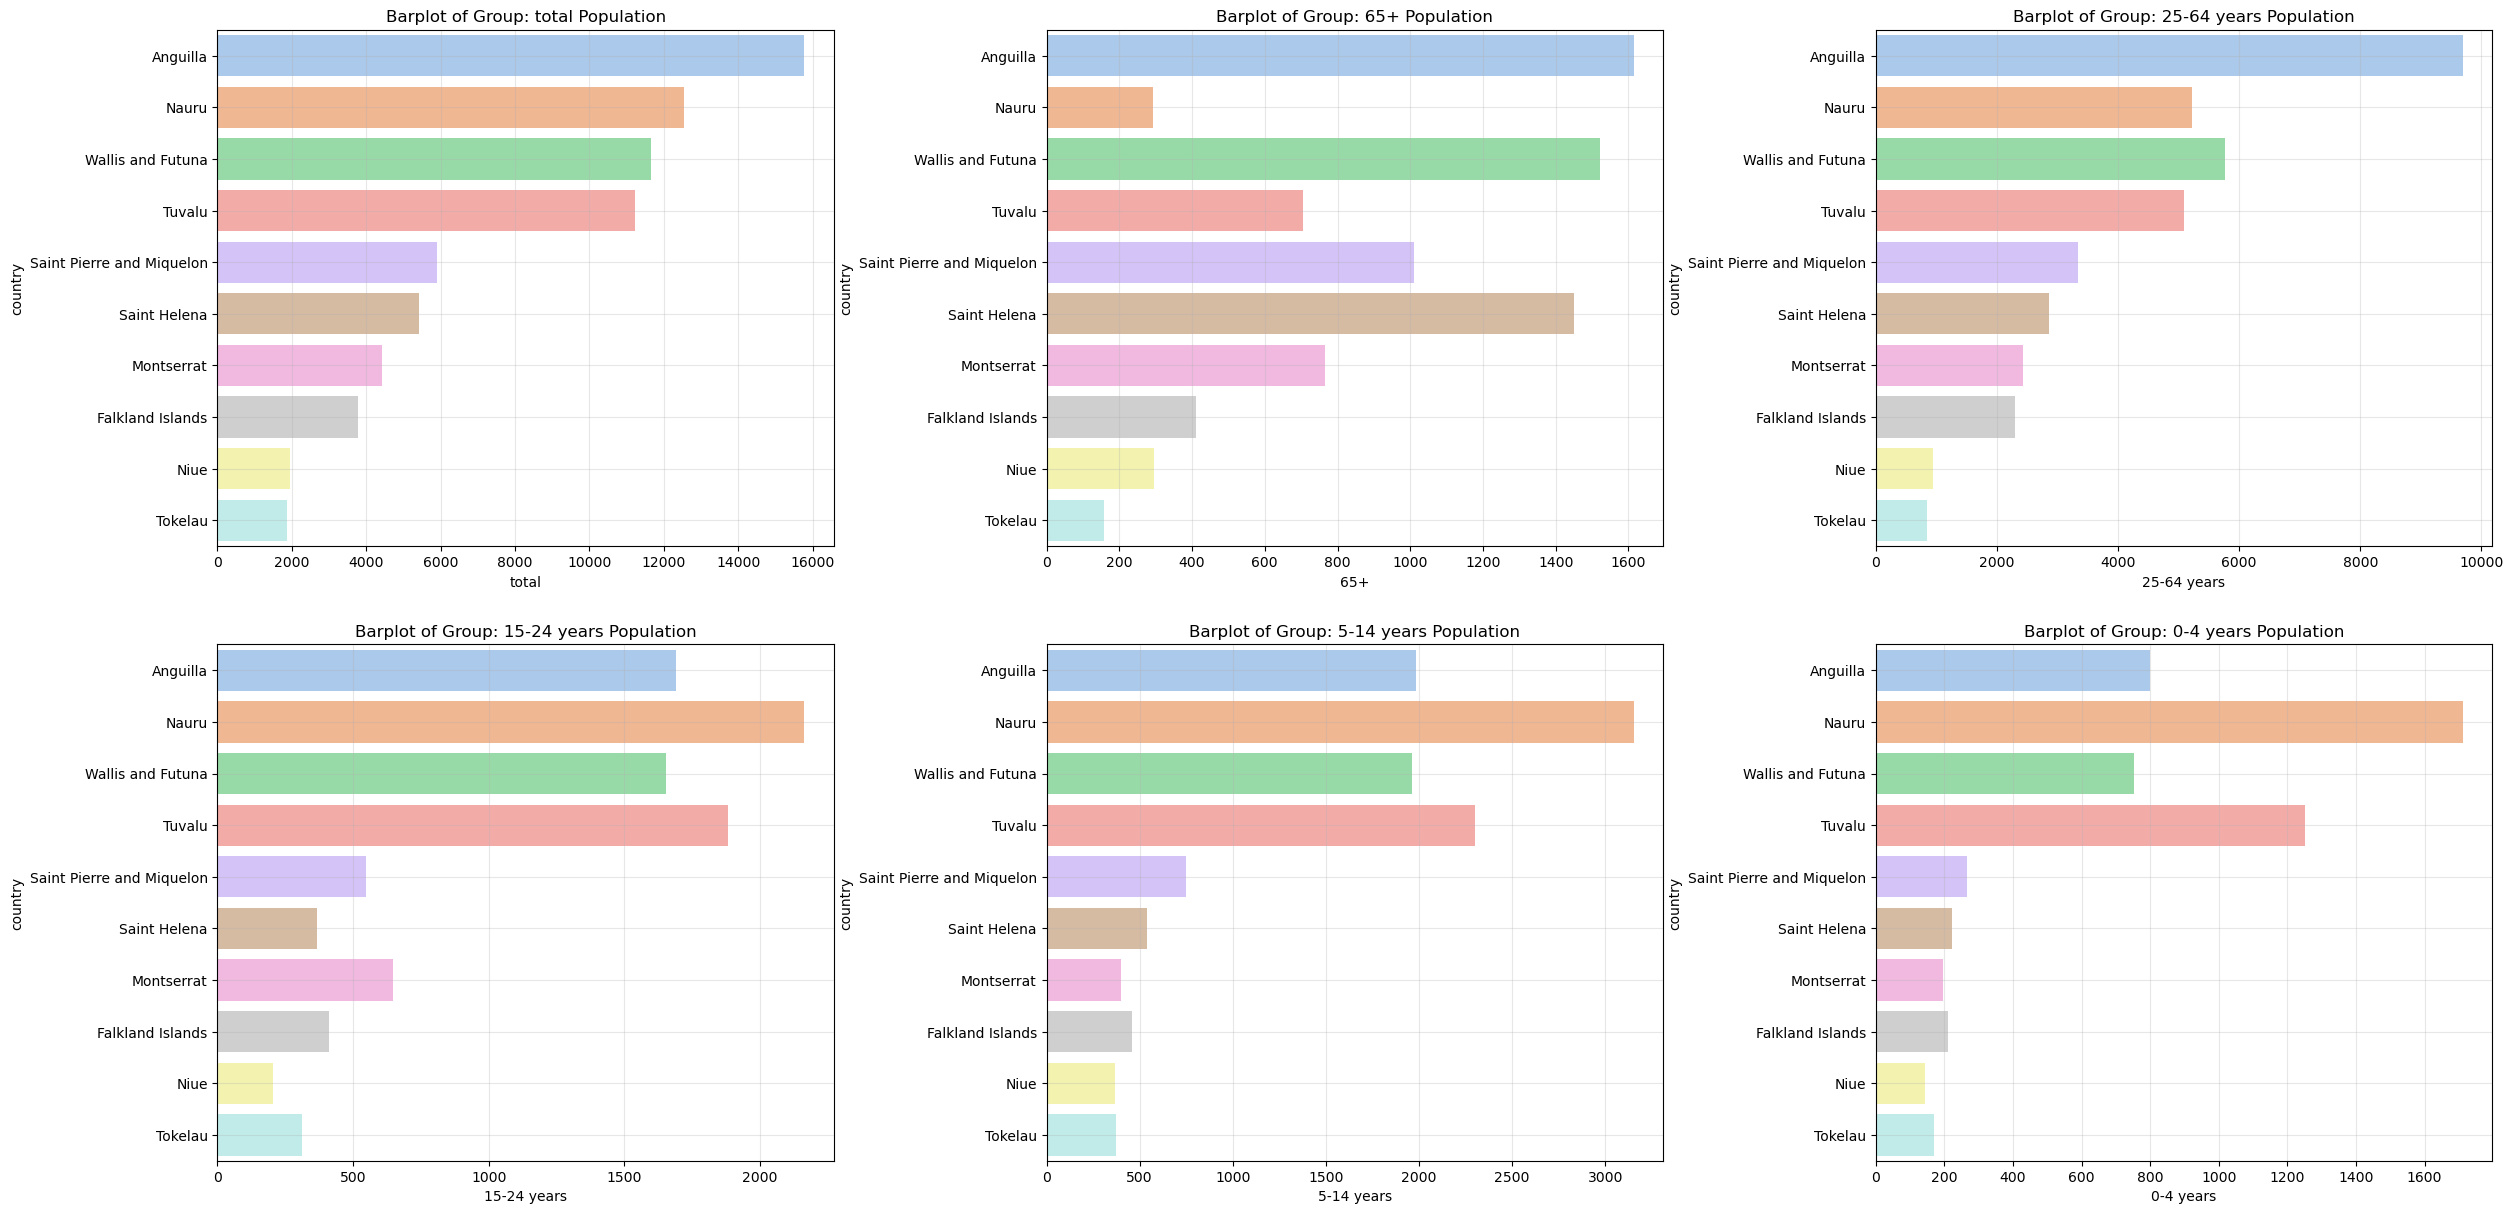

In [26]:
fig, ax = plt.subplots(2, 3, figsize=(25,12))
ax = ax.flatten()
i = 0

for k in population.drop(columns='country').columns:
    sns.barplot(x=population[k][-10:], y=population['country'][-10:], palette='pastel', ax=ax[i])
    ax[i].set_title(f"Barplot of Group: {k} Population")
    ax[i].grid(alpha=0.3)
    i += 1

plt.tight_layout(pad=0.2, w_pad=0.2, h_pad=2.5)
plt.show()


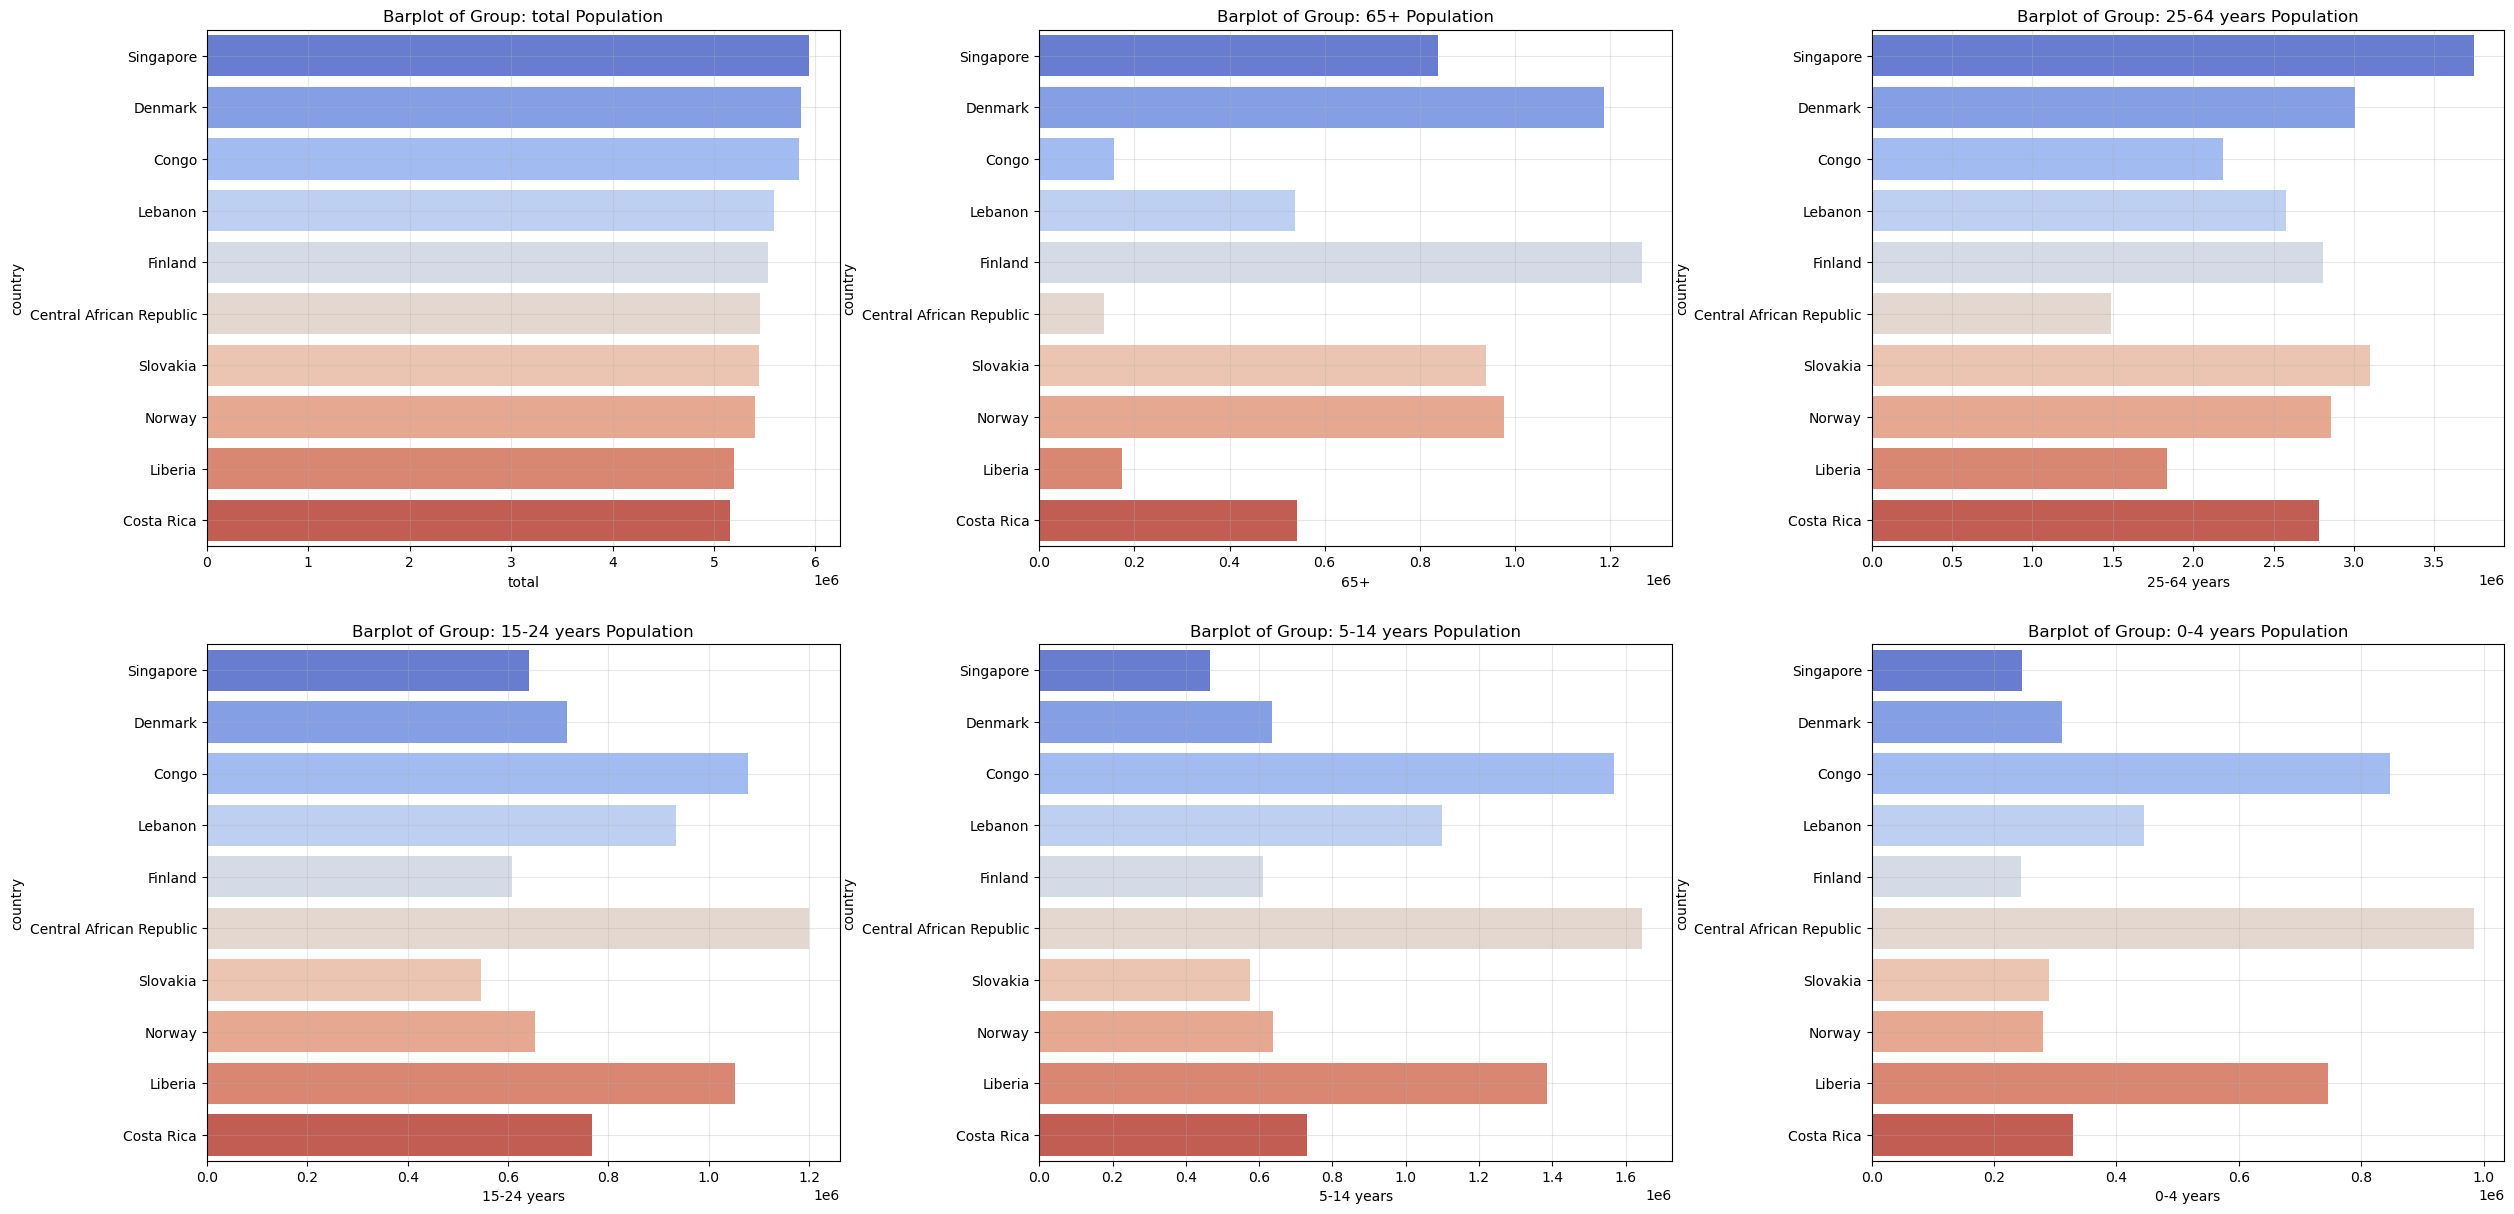

In [28]:
fig, ax = plt.subplots(2, 3, figsize=(25,12))
ax = ax.flatten()
m = population.shape[0] // 2
i = 0

for k in population.drop(columns='country').columns:
    sns.barplot(x=population[k][m-5:m+5], y=population['country'][m-5:m+5], palette='coolwarm', ax=ax[i])
    ax[i].set_title(f"Barplot of Group: {k} Population")
    ax[i].grid(alpha=0.3)
    i += 1

plt.tight_layout(pad=0.2, w_pad=0.2, h_pad=2.5)
plt.show()

# <span style="color:pink" ><h3 align="center"> <b>_REFLECTIONS_ </h3>

Excel spreadsheets are the standard in the business world for all kinds of data analysis tasks. While Excel's simplicity makes it so commonplace, it also brings about some limitations. Python, on the other hand, is a more advanced programming language that is commonly used for data analysis and data science. Jupyter notebooks are far more interactive and create far nicer visualizations than comparatively static, boring spreadsheets. On the other hand while most people have at least a basic understanding of how to work with Excel, Jupyter skills are harder to come by in most industries.
    
I am currently already using both Excel and Python in my role of Customer Insights. i use the two softwares to play around with data and visualize it. If i would re-do the assignment. I would add more graphs/visualizations that are simpler to understand through just browsing the notebook.
